# Climate Change and Deaths from Cancer Analysis

In this analysis, we would like to see the correlation between climate change and deaths from Cancer, specifically at the top 5 countries with the highest population in the world.
1. China
2. India
3. United States
4. Indonesia
5. Brazil

In [1]:
%matplotlib inline

In [8]:
# Dependencies and Set Up
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
# Read csv for temperature by countries from 1991 to 2016
temp_china = pd.read_csv("./Resources/temperature_1991_2016_China.csv")
temp_india = pd.read_csv("./Resources/temperature_1991_2016_India.csv")
temp_usa = pd.read_csv("./Resources/temperature_1991_2016_USA.csv")
temp_indonesia = pd.read_csv("./Resources/temperature_1991_2016_Indonesia.csv")
temp_brazil = pd.read_csv("./Resources/temperature_1991_2016_Brazil.csv")


In [10]:
# Check and print the temperature data (China)
temp_china.head()

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-8.05810,1991,Jan Average,China,CHN
1,-4.63730,1991,Feb Average,China,CHN
2,0.59422,1991,Mar Average,China,CHN
3,7.42692,1991,Apr Average,China,CHN
4,13.00760,1991,May Average,China,CHN


In [11]:
# Grouping the DataFrame by year
temp_china_by_year = temp_china.groupby(["Year"])

# Calculate the average temperature by year and print in DataFrame
temp_china_by_year_mean = pd.DataFrame(temp_china_by_year["Temperature - (Celsius)"].mean())
temp_china_by_year_mean

,Temperature - (Celsius)
Year,
1991,6.576699
1992,6.348807
1993,6.395261
1994,6.983019
1995,6.752751
1996,6.417824
1997,6.843258
1998,7.503825
1999,7.299526


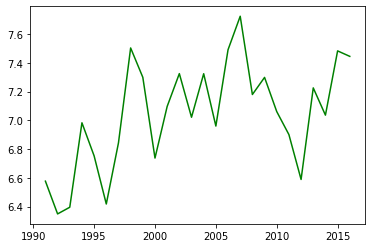

In [12]:
# Plot the graph based on mean temperature in China by year (1991 to 2016)
plt.plot(temp_china_by_year_mean.index, temp_china_by_year_mean["Temperature - (Celsius)"],
        color="green")
plt.show()

In [13]:
# Perform a linear regression on the temperature year by year
year = temp_china_by_year_mean.index
temp = temp_china_by_year_mean["Temperature - (Celsius)"]

(slope, intercept, r_value, p_value, std_err) = stats.linregress(year, temp)

# Get regression values
regress_values = year * slope + intercept
print(regress_values)

Float64Index([ 6.706293910256406,  6.732936948717949,  6.759579987179485,
               6.786223025641021,  6.812866064102565,  6.839509102564101,
               6.866152141025637,   6.89279517948718,  6.919438217948716,
              6.9460812564102525,  6.972724294871796,  6.999367333333332,
               7.026010371794868,  7.052653410256411, 7.0792964487179475,
               7.105939487179484,  7.132582525641027,  7.159225564102563,
               7.185868602564099, 7.2125116410256425,  7.239154679487179,
               7.265797717948715,  7.292440756410258,  7.319083794871794,
                7.34572683333333,  7.372369871794874],
             dtype='float64', name='Year')


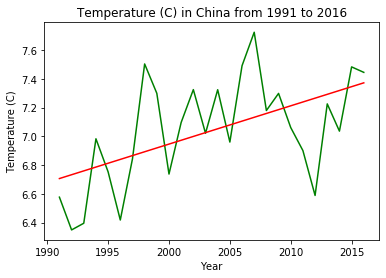

In [15]:
# Create plot for temperature in China from 1991 to 2016 with the line regression
plt.plot(temp_china_by_year_mean.index, temp_china_by_year_mean["Temperature - (Celsius)"],
        color="green")
plt.plot(year, regress_values, color="red")
plt.title("Temperature (C) in China from 1991 to 2016")
plt.xlabel("Year")
plt.ylabel("Temperature (C)")
plt.show()

In [ ]:
# Check and print the temperature data (India)
temp_india.head()

In [ ]:
# Check and print the temperature data (USA)
temp_usa.head()

In [ ]:
# Check and print the temperature data (Indonesia)
temp_indonesia.head()

In [ ]:
# Check and print the temperature data (Brazil)
temp_brazil.head()

In [ ]:
# Read the csv for the annual CO2 emission by country
CO2_emission = pd.read_csv("./Resources/annual_co2_emissions_by_region.csv")
CO2_emission.head()

In [ ]:
# Rename the column name
CO2_emission = CO2_emission.rename(
    columns = {"Entity": "Country", "Annual CO2 emissions (tonnes )": "CO2 emissions (tonnes)"})
CO2_emission.head()

In [ ]:
# Extract only China data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_china = CO2_emission.loc[(CO2_emission["Country"] == "China"), columns]
CO2_emission_china.head()

In [ ]:
# Extract China data for 1991 to 2016 only
CO2_emission_china = CO2_emission_china.set_index("Year")

years = np.arange(1991, 2017, 1)

years_91_16 = []

for year in years:
    years_91_16.append(year)
    
# years_91_16

CO2_emission_china = CO2_emission_china.loc[years_91_16]
CO2_emission_china.head(15)

In [ ]:
# Extract only India data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_india = CO2_emission.loc[(CO2_emission["Country"] == "India"), columns]
CO2_emission_india.head()

In [ ]:
# Extract India data for 1991 to 2016 only
CO2_emission_india = CO2_emission_india.set_index("Year")

CO2_emission_india = CO2_emission_india.loc[years_91_16]
CO2_emission_india.head(15)

In [ ]:
# Extract only United States data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_usa = CO2_emission.loc[(CO2_emission["Country"] == "United States"), columns]
CO2_emission_usa.head()

In [ ]:
# Extract United States data for 1991 to 2016 only
CO2_emission_usa = CO2_emission_usa.set_index("Year")

CO2_emission_usa = CO2_emission_usa.loc[years_91_16]
CO2_emission_usa.head(15)

In [ ]:
# Extract only Indonesia data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_indonesia = CO2_emission.loc[(CO2_emission["Country"] == "Indonesia"), columns]
CO2_emission_indonesia.head()

In [ ]:
# Extract Indonesia data for 1991 to 2016 only
CO2_emission_indonesia = CO2_emission_indonesia.set_index("Year")

CO2_emission_indonesia = CO2_emission_indonesia.loc[years_91_16]
CO2_emission_indonesia.head(15)

In [ ]:
# Extract only Brazil data
columns = ["Country", "Year", "CO2 emissions (tonnes)"]

CO2_emission_brazil = CO2_emission.loc[(CO2_emission["Country"] == "Brazil"), columns]
CO2_emission_brazil.head()

In [ ]:
# Extract Brazil data for 1991 to 2016 only
CO2_emission_brazil = CO2_emission_brazil.set_index("Year")

CO2_emission_brazil = CO2_emission_brazil.loc[years_91_16]
CO2_emission_brazil.head(15)

In [ ]:
# Read the csv for total cancer deaths by cancer types
cancer_deaths = pd.read_csv("./Resources/total_cancer_deaths_by_type.csv")
cancer_deaths.head()

In [ ]:
# Seeing the list of column names
list(cancer_deaths.columns)

In [ ]:
# Extracting the columns for Country/Entity, Year, and deaths because of lung cancer
lung_cancer_deaths = cancer_deaths.loc[:, ["Entity", "Year", "Tracheal, bronchus, and lung cancer (deaths)"]]
lung_cancer_deaths.head()

In [ ]:
# Rename the column name
lung_cancer_deaths = lung_cancer_deaths.rename(columns = {"Entity": "Country"})
lung_cancer_deaths.head()

In [ ]:
# Extract the deaths caused by lung cancer for China only
lung_cancer_deaths_china = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "China"]

# Set index as year and extract the deaths caused by lung cancer in China for year 1991 to 2016 only
lung_cancer_deaths_china = lung_cancer_deaths_china.set_index("Year")
lung_cancer_deaths_china = lung_cancer_deaths_china.loc[years_91_16]

lung_cancer_deaths_china.head(15)


In [ ]:
# Extract the deaths caused by lung cancer for India only
lung_cancer_deaths_india = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "India"]

# Set index as year and extract the deaths caused by lung cancer in India for year 1991 to 2016 only
lung_cancer_deaths_india = lung_cancer_deaths_india.set_index("Year")
lung_cancer_deaths_india = lung_cancer_deaths_india.loc[years_91_16]

lung_cancer_deaths_india.head(15)

In [ ]:
# Extract the deaths caused by lung cancer for United States only
lung_cancer_deaths_usa = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "United States"]

# Set index as year and extract the deaths caused by lung cancer in United States for year 1991 to 2016 only
lung_cancer_deaths_usa = lung_cancer_deaths_usa.set_index("Year")
lung_cancer_deaths_usa = lung_cancer_deaths_usa.loc[years_91_16]

lung_cancer_deaths_usa.head(15)

In [ ]:
# Extract the deaths caused by lung cancer for Indonesia only
lung_cancer_deaths_indonesia = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "Indonesia"]

# Set index as year and extract the deaths caused by lung cancer in Indonesia for year 1991 to 2016 only
lung_cancer_deaths_indonesia = lung_cancer_deaths_indonesia.set_index("Year")
lung_cancer_deaths_indonesia = lung_cancer_deaths_indonesia.loc[years_91_16]

lung_cancer_deaths_indonesia.head(15)

In [ ]:
# Extract the deaths caused by lung cancer for Brazil only
lung_cancer_deaths_brazil = lung_cancer_deaths.loc[lung_cancer_deaths["Country"] == "Brazil"]

# Set index as year and extract the deaths caused by lung cancer in Brazil for year 1991 to 2016 only
lung_cancer_deaths_brazil = lung_cancer_deaths_brazil.set_index("Year")
lung_cancer_deaths_brazil = lung_cancer_deaths_brazil.loc[years_91_16]

lung_cancer_deaths_brazil.head(15)

In [ ]:
# Plot the graph based on CO2 emission data for China
plt.plot(CO2_emission_china.index, CO2_emission_china["CO2 emissions (tonnes)"], 
         color="red", marker="o", markersize=5, linewidth=0.5)

plt.show()

In [ ]:
# Plot the graph based on lung cancer deaths data for China 
plt.plot(lung_cancer_deaths_china.index, lung_cancer_deaths_china["Tracheal, bronchus, and lung cancer (deaths)"],
        color="blue", marker="o", markersize=5, linewidth=0.5)
plt.show()

In [ ]:
# Plot both CO2 emission and lung cancer deaths data for China in one graph
years = np.arange(1991, 2017, 1)

years_label = []
for year in years:
    years_label.append(year)

fig, ax1 = plt.subplots(figsize=(10,10))

ax1.plot(years, CO2_emission_china["CO2 emissions (tonnes)"],
        color="red", linewidth=1)
ax1.set_xlabel("Year")
ax1.set_ylabel("CO2 Emissions in China (Tonnes)", color="red")
ax1.set_xticks(years_label)
ax1.set_xticklabels(years_label, rotation=45)

ax2 = ax1.twinx()

ax2.plot(years, lung_cancer_deaths_china["Tracheal, bronchus, and lung cancer (deaths)"],
        color="blue", linewidth=1)
ax2.set_ylabel("Tracheal, bronchus, and lung cancer (deaths)", color="blue")

# fig.tight_layout()
plt.title("CO2 Emissions and Deaths Caused by Tracheal, Bronchus, Lung Cancer in China from 1991 to 2016")
plt.show()
